# Logistic Regression

It is used for classification problems. It outputs probabilities. If p>0.5, the data is labeled 1 else 0.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
pip install opendatasets

In [7]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/erhankul/shanghai-air-pollution-and-wheather-20142021")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phctuynl
Your Kaggle Key: ··········


100%|██████████| 175k/175k [00:00<00:00, 49.0MB/s]

In [8]:
df = pd.read_csv("shanghai-air-pollution-and-wheather-20142021/Shanghai AQI and Wheather 2014-2021.csv")
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [9]:
df.AQI_Explained.unique()

array(['Hazardous', 'Very unhealthy', 'Unhealthy',
       'Unhealthy for sensitive groups', 'Moderate'], dtype=object)

In [10]:
AQI_class = {"Moderate": 1, "Unhealthy": 2, "Unhealthy for sensitive groups": 3, "Very unhealthy": 4, "Hazardous": 5}

In [11]:
df = df.replace({'AQI_Explained': AQI_class})
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,5
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,5
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,5
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,5
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,5


In [12]:
X = df.drop(columns=["AQI", "AQI_Explained", "date"])
y = df['AQI_Explained']
X.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,11.0,17.0,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0
1,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,11.0,21.0,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0
2,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,11.0,21.0,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0
3,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,7.0,17.0,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0
4,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,9.0,9.0,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
logreg.predict(X_test)

array([3, 5, 5, 5, 5, 5, 5, 3, 5, 4, 5, 5, 4, 5, 5, 2, 5, 5, 5, 5, 5, 2,
       4, 5, 5, 5, 5, 4, 3, 5, 5, 5, 3, 3, 4, 3, 5, 5, 3, 4, 5, 5, 2, 3,
       4, 5, 3, 3, 5, 5, 5, 4, 3, 3, 5, 3, 5, 2, 3, 5, 3, 3, 4, 3, 3, 3,
       3, 5, 3, 3, 5, 3, 3, 3, 3, 3, 4, 2, 5, 5, 5, 4, 5, 3, 5, 3, 5, 3,
       5, 5, 3, 3, 5, 5, 3, 5, 4, 5, 5, 5, 5, 3, 5, 3, 2, 5, 5, 4, 5, 3,
       3, 3, 5, 5, 5, 3, 2, 3, 5, 5, 3, 3, 3, 5, 5, 5, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 3, 5, 3, 5, 3, 5, 5, 3, 3, 4, 3, 4, 5, 3, 5, 3, 5, 4,
       5, 5, 5, 3, 4, 5, 5, 5, 3, 3, 2, 5, 5, 2, 5, 4, 4, 4, 5, 3, 4, 3,
       5, 5, 3, 3, 3, 4, 2, 5, 4, 5, 5, 5, 4, 5, 3, 5, 5, 5, 3, 5, 5, 3,
       5, 5, 5, 5, 3, 5, 3, 5, 3, 5, 5, 5, 3, 3, 4, 5, 5, 4, 3, 2, 5, 3,
       4, 5, 5, 5, 5, 3, 5, 5, 3, 3, 3, 4, 4, 3, 4, 5, 5, 5, 5, 5, 3, 5,
       3, 5, 5, 4, 5, 5, 2, 5, 5, 2, 4, 5, 5, 2, 3, 3, 3, 5, 5, 3, 3, 4,
       5, 5, 5, 2, 3, 5, 5, 5, 5, 2, 3, 4, 5, 5, 3, 3, 5, 4, 5, 5, 5, 4,
       5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 3, 4, 5, 5, 3,

In [34]:
logreg.score(X_test, y_test)

0.7225548902195609

## ROC curve

The main objective of ROC curve is to access the overall diagnostic performance of a test and compare the performance of different threshold values.

**It is commonly used for the binary classification only**

In [22]:
df = pd.read_csv("shanghai-air-pollution-and-wheather-20142021/Shanghai AQI and Wheather 2014-2021.csv")
df['AQI_Explained'] = np.where(df['AQI_Explained']=='Hazardous', 1, 0)
df.head()
# df.tail()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,1
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,1
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,1
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,1
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,1


In [28]:
X = df.drop(columns=["AQI", "AQI_Explained", "date","totalSnow_cm","precipMM"])
y = df['AQI_Explained']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [30]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred_probs[0]

0.056031168275865656

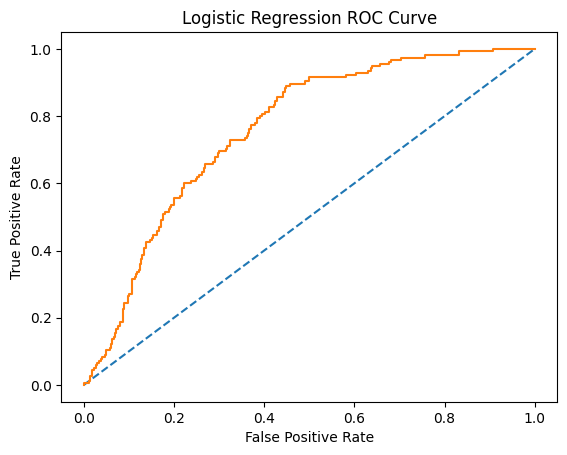

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

## ROC Area Under Curve

Greater the value of ROC AUC, better the model accuracy.

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_probs)

0.7594070482938654

In [35]:
logreg.score(X_test, y_test)

0.7225548902195609

## Reference

1. [Calculating and Setting Thresholds to Optimise Logistic Regression Performance](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e)

# Thank you!